In [1]:
from numpy import sqrt, pi, exp, arcsin, linspace, loadtxt, zeros, diag
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.special import hyp2f1
from scipy.stats import linregress

In [2]:
def show_params(D1, D2, K, exp, calc):
    R_sq = linregress(exp, calc)[2]**2
    table_data = {
        'D1'   : D1,
        'D2'   : D2,
        'D1/D2': D1/D2,
        'K'    : K,
        'R^2'  : R_sq
    }
    props_table = DataFrame(
        table_data,
        index=[0],
        columns=['D1', 'D2', 'D1/D2', 'K', 'R^2']
    )
    return props_table.style

def plot(x0, D_obs, *args):
    fig  = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.plot(x0, D_obs, 'o', linewidth=3, color='#90CAF9', label='D (observed)')
    axes.plot(x0, SHIM(x0, args[0], args[1], args[2]), linewidth=2, color='#BA68C8', label='D (SHIM)')
    axes.plot(x0, SHIM(x0, args[3], args[4], args[5]), '--', linewidth=1, color='green', label='suppl. calc')
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.xaxis.set_ticks_position('bottom')
    axes.yaxis.set_ticks_position('left')
    axes.set_xlabel('Concentration')
    axes.set_ylabel('D')
    axes.legend()
    axes.grid(alpha=.5)
    plt.show()

def SHIM(x0, D1, D2, K):
    x1 = (1+2*K*x0-(1+4*K*x0)**.5)/(2*(K**2)*x0)
    return D1*x1/x0*hyp2f1(2, D2/(D1-D2), D1/(D1-D2), K*x1)

Concentration: [ 5.   4.5  4.   3.8  3.2  2.   1.   0.8  0.4  0.2]
D experimental: [ 0.842  0.744  0.848  0.902  0.932  1.024  1.188  1.338  1.507  1.671]


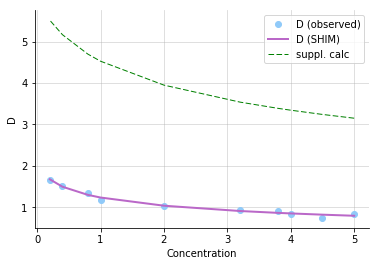

In [3]:
aik_data = loadtxt('data_files\\aik.dat')
x0 = aik_data[:,0]
D_obs = aik_data[:,1] * 1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[1.4, 1.2, .4],
        bounds=([1,0,.3], [10,10,10]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 6.046585245, 4.36710237, 1.036705676)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [ 31.1  27.   23.5  20.   18.   16.   14.   12.   10.    8.    6.    4.5
   3.    1.5]
D experimental: [ 5.8665   5.904    5.959    6.0405   6.1495   6.11625  6.1195   6.22625
  6.2075   6.33325  6.3885   6.5015   6.54175  6.691  ]


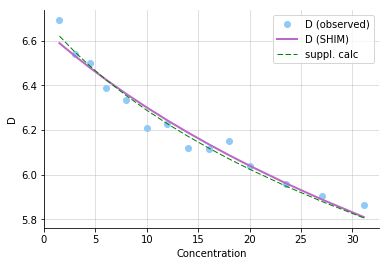

In [4]:
caf_data = loadtxt('data_files\\caf.dat')
x0 = caf_data[:,0]
D_obs = caf_data[:,1]*1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[7, 5.5, 1.15e-2],
        loss='soft_l1',
        bounds=([6,5,1e-2], [8,6,1.3e-2]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 6.700092743, 5.845994206, .033101402)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [ 5.016  4.3    3.6    3.     2.5    2.1    1.7    1.4    1.1    0.9    0.7
  0.55   0.4    0.2    0.1  ]
D experimental: [ 3.74285714  3.82057143  3.917       4.02714286  4.092       4.19514286
  4.25        4.33285714  4.38671429  4.44214286  4.56685714  4.5875      4.8
  4.83216667  4.88183333]


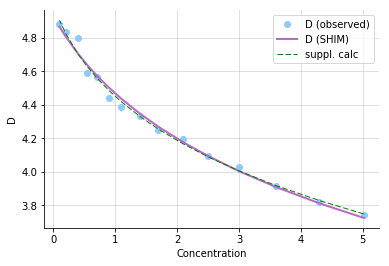

In [5]:
eb_data = loadtxt('data_files\\eb.dat')
x0 = eb_data[:,0]
D_obs = eb_data[:,1]*1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[4.8, 4, .3],
        loss='soft_l1',
        bounds=([4,3,.2], [6,5,.4]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 5.000985502, 4.5332945, 1.161351576)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [  0.1   0.2   0.4   0.8   1.6   2.    3.2   3.8   4.    4.5   5.    6.
   7.   10. ]
D experimental: [ 4.117  3.994  3.432  2.738  2.054  2.317  1.778  1.671  1.646  1.778
  1.673  1.582  1.481  1.308]


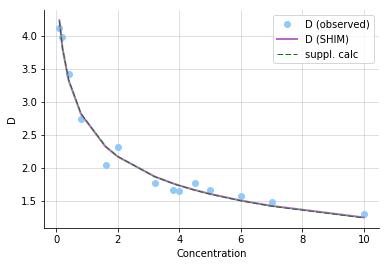

In [6]:
nb_data = loadtxt('data_files\\nb.dat')
x0 = nb_data[:,0]
D_obs = nb_data[:,1]*1e10

(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[4.7, 3.5, 6],
        loss='soft_l1',
        bounds=([4,3,5.5], [7, 5, 6]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 5.006336409, 3.493836991, 4.099913202)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [ 5.2   4.5   3.8   3.2   2.6   2.1   1.65  1.35  1.1   0.9   0.7   0.5
  0.3   0.15]
D experimental: [ 3.1205   3.2855   3.3605   3.53125  3.704    3.8445   4.0855   4.216
  4.374    4.528    4.7935   4.99     5.392    5.62125]


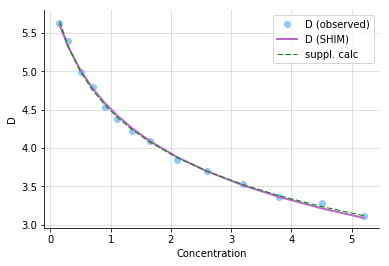

In [7]:
pf_data = loadtxt('data_files\\pf.dat')
x0 = pf_data[:,0]
D_obs = pf_data[:,1]*1e10
(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[6, 5, .7],
        loss='soft_l1',
        bounds=([0,0,.1], [10,10,1]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 6.239209341, 5.005948387, 2.218750179)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [ 13.5     9.45    8.1     6.75    6.08    5.4     5.13    4.32    2.7
   1.35    1.08    0.54    0.27    0.05    0.025]
D experimental: [ 1.548  1.656  1.642  1.722  1.775  1.752  1.8    1.852  2.03   2.299
  2.352  2.516  2.763  3.253  3.894]


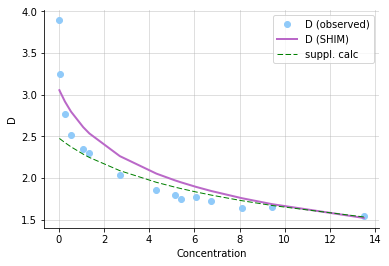

In [8]:
dc1_data = loadtxt('data_files\\dc1.dat')
x0 = dc1_data[:,0]
D_obs = dc1_data[:,1]*1e10
(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[5, 4, .2],
        loss='soft_l1',
        bounds=([2,2,.1], [10,10,.3]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 2.479998219, 1.541642647, 0.117028721)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [ 10.    7.    6.    5.    4.5   4.    3.8   3.2   2.    1.    0.8   0.4
   0.2   0.1]
D experimental: [ 2.897  2.943  2.956  3.004  3.013  3.175  3.209  3.261  3.347  3.452
  3.498  3.564  3.563  3.619]


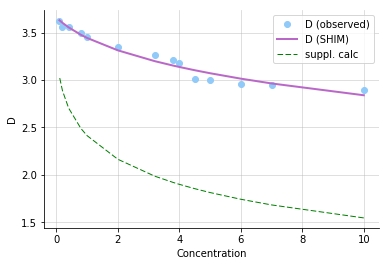

In [9]:
dc2_data = loadtxt('data_files\\dc2.dat')
x0 = dc2_data[:,0]
D_obs = dc2_data[:,1]*1e10
(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[3.5, 3, 2.2],
        bounds=([0,0,.5], [10,10,5.2]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 3.406135723, 3.287904248, 52.42028279)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))

Concentration: [ 10.    7.    6.    5.    4.5   4.    3.8   3.2   2.    1.    0.8   0.4
   0.2]
D experimental: [ 2.989  3.048  3.052  3.09   3.119  3.142  3.139  3.159  3.244  3.29
  3.392  3.445  3.51 ]


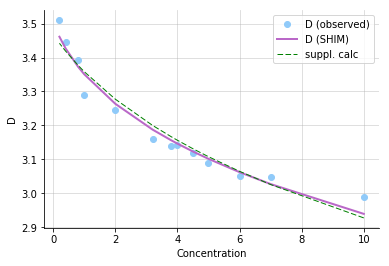

In [10]:
das_data = loadtxt('data_files\\dc3.dat')
x0 = das_data[:,0]
D_obs = das_data[:,1]*1e10
(D1, D2, K), cov = curve_fit(
        SHIM, x0, D_obs,
        p0=[3.5, 3.1, .6],
        bounds=([1,1,.03], [6,4,1]))

print('Concentration:', x0)
print('D experimental:', D_obs)
plot(x0, D_obs, D1, D2, K, 3.467333592, 3.110810143, .185153254)
show_params(D1, D2, K, D_obs, SHIM(x0, D1, D2, K))